In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

path = "titanic.csv"

dfRaw = pd.read_csv(path)
dfRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
df = dfRaw
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [3]:
df.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN


In [4]:
len(df) - df["Age"].count() # Calc nNans

177

In [5]:
needs1HE = ["Age", "Fare"]

ageBins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100]
age1HE = pd.cut(df["Age"], ageBins)
df = pd.concat([df.drop('Age', axis=1), age1HE], axis=1)
age1HE = pd.get_dummies(df["Age"], prefix="Age")
df = pd.concat([df.drop('Age', axis=1), age1HE], axis=1)

# fareBins = [0, 50, 150, 200, 250, 300, 350, 400, 450, 500, 550]
fareBins = [0, 50, 150, 200, 250, 300, 550]
fare1HE = pd.cut(df["Fare"], fareBins)
df = pd.concat([df.drop('Fare', axis=1), fare1HE], axis=1)
fare1HE = pd.get_dummies(df["Fare"], prefix="Fare")
df = pd.concat([df.drop('Fare', axis=1), fare1HE], axis=1)

embarked1HE = pd.get_dummies(df["Embarked"], prefix="Embarked")
df = pd.concat([df.drop('Embarked', axis=1), embarked1HE], axis=1)

df.describe(include="all")
# age1HE

,Survived,Pclass,Sex,SibSp,Parch,"Age_(0, 5]","Age_(5, 10]","Age_(10, 15]","Age_(15, 20]","Age_(20, 25]",...,"Age_(75, 100]","Fare_(0, 50]","Fare_(50, 150]","Fare_(150, 200]","Fare_(200, 250]","Fare_(250, 300]","Fare_(300, 550]",Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,0.523008,0.381594,0.049383,0.022447,0.021324,0.107744,0.136925,...,0.001122,0.803591,0.147026,0.010101,0.012346,0.006734,0.003367,0.188552,0.086420,0.722783
std,0.486592,0.836071,NaN,1.102743,0.806057,0.216787,0.148214,0.144544,0.310231,0.343961,...,0.033501,0.397504,0.354331,0.100051,0.110485,0.081830,0.057961,0.391372,0.281141,0.447876
min,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


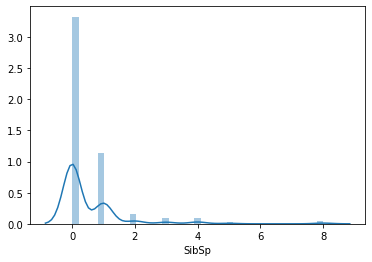

In [11]:
sns.distplot(df["SibSp"]y.dropna())

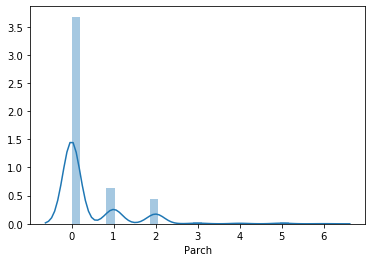

In [12]:
sns.distplot(df["Parch"].dropna())

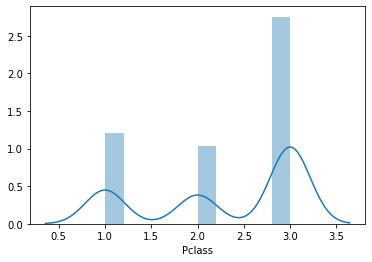

In [16]:
sns.distplot(df["Pclass"].dropna())

In [18]:
sns.catplot(dfRaw["Embarked"], kind="count")

TypeError: object of type 'NoneType' has no len()